<a href="https://colab.research.google.com/github/Stonepia/Scipy-Lec/blob/master/1_5_Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy

In [0]:
import numpy as np

## File input/output:

##### Matlab files:

In [0]:
from scipy import io as spio
a = np.ones((3,3))
spio.savemat('file.mat',{'a':a})
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

##### Image files:

In [0]:
from scipy import misc

misc.imread('fname.png')
# Matplotlib also has a similar function
import matplotlib.pyplot as plt
plt.imread('fname.png')

## Linea algebra operations: [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)

In [0]:
from scipy import linalg
arr = np.array([[1,2],
               [3,4]])

# scipy.linalg.det() computes the determinant of a square matrix
print(linalg.det(arr))

print("-"*15)
# scipy.linalg.inv() conputes the inverse of a square matrix
print(linalg.inv(arr))

# Computing the inverse of a singular matrix(determinant is 0) will raise LinAlgError:
arr = np.array([[3,2],
               [6,4]])
linalg.inv(arr)

-2.0
---------------
[[-2.   1. ]
 [ 1.5 -0.5]]


LinAlgError: ignored

In [0]:
# More advanced operations:
# Compute the singular-value decomposition (SVD)
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
uarr, spec, vharr = linalg.svd(arr)

## Interpolation
[interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)

In [0]:
measured_time = np.linspace(0,1,10)
noise = (np.random.random(10)*2 -1) * 1e-1
measures = np.sin(2*np.pi * measured_time) +noise


In [0]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

interpolation_time = np.linspace(0, 1, 50)
linear_results = linear_interp(interpolation_time)

In [0]:
# Cubic interpolation
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

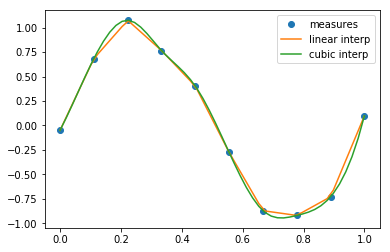

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

## Optimization and fit

[scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)

In [0]:
from scipy import optimize

### Curve fitting

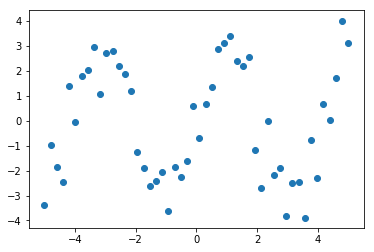

In [0]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [0]:
def test_func(x,a,b):
  return a*np.sin(b*x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2,2])

print(params)

[2.95081101 1.51565657]


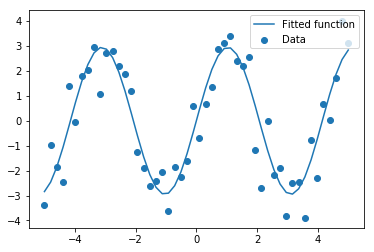

In [0]:
plt.figure(figsize=(6,4))
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, test_func(x_data, params[0], params[1]),
        label = "Fitted function")

plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Temperature ($^\\circ$C)')

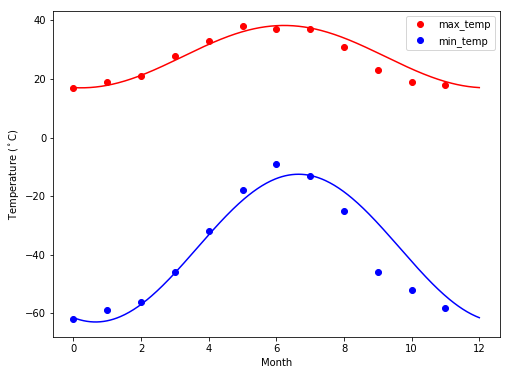

In [0]:
# Exercise : Curve fitting of temperature data
temp_max = np.array([ 17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])


def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)


plt.figure(figsize=(8,6))
months = np.arange(12)
plt.plot(months, temp_max,'ro',label='max_temp')
plt.plot(months, temp_min,'bo', label='min_temp')
plt.legend(loc='best')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')


### FInding the minimum of a scalar function

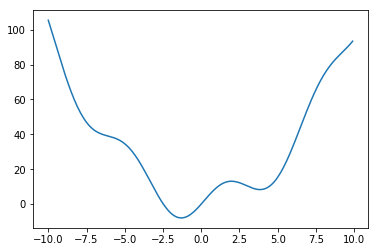

In [0]:
def f(x):
    return x**2 + 10*np.sin(x)
  
x =np.arange(-10,10,.1)
plt.plot(x,f(x))

In [0]:
result = optimize.minimize(f,x0=0)
result

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])

This may find the local minima instead of the global one:

In [0]:
res = optimize.minimize(f,x0=3)
res

      fun: 8.315585579477458
 hess_inv: array([[0.11886955]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([3.83746709])

To find the global minimu,. we use [scipy.optimize.basinhopping()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping). It combines a local optimizer  with sampling of starting points:

In [0]:
optimize.basinhopping(f,0)

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[0.08580554]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1530
                        nit: 100
                       njev: 510
                          x: array([-1.30644001])

##### Exercise : 2-D minimization

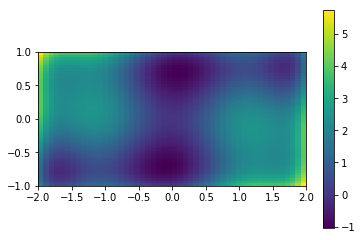

In [0]:
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)
  

x = np.linspace(-2,2)
y = np.linspace(-1,1)
xg, yg = np.meshgrid(x,y)

z = sixhump([xg, yg])
plt.imshow(z, extent=[-2,2,-1,1])
plt.colorbar()
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Six-hump Camelback function')

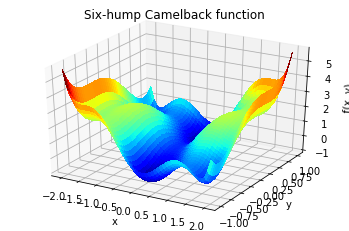

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg,yg, sixhump([xg,yg]), rstride =1, cstride=1,
                      cmap = plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')


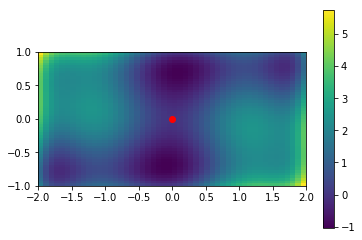

In [0]:
x_min = optimize.minimize(sixhump, x0=[0,0])

plt.figure()
plt.imshow(sixhump([xg,yg]), extent =[-2, 2, -1,1])
plt.colorbar()
plt.scatter(x_min.x[0], x_min.x[1], color='red')
plt.show()

### Finding the roots of a scalar function

In [0]:
root = optimize.root(f,x0=1)
root

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.33310463e-32])
       r: array([-10.])
  status: 1
 success: True
       x: array([0.])

Note that only one root is found. Another root can be found by set `x0` to another value, say, -2.5

## Statisticks and random numbers: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

### Spectrogram, power spectral density

#### Generate a chrip signal

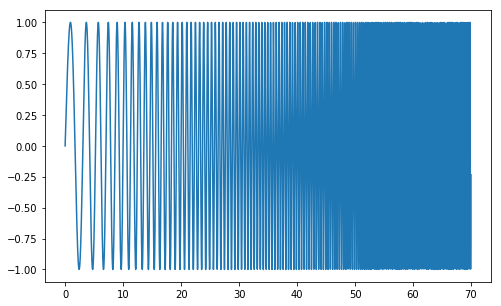

In [0]:
np.random.seed(0)

time_step = .01
time_vec = np.arange(0,70,time_step)

sig = np.sin(0.5*np.pi * time_vec* (1+.1*time_vec))

plt.figure(figsize=(8,5))
plt.plot(time_vec, sig)

#### Compute and plot the spectrogram

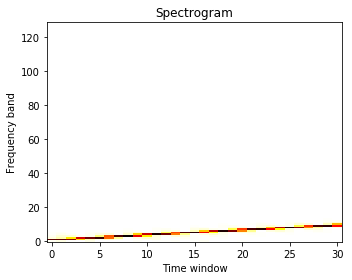

In [0]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sig)

plt.figure(figsize=(5,4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

#### Compute and plot the power spectral density(PSD)

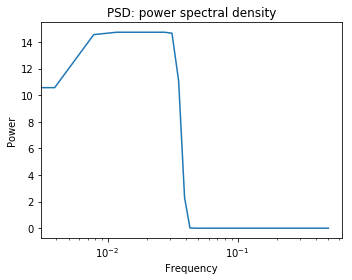

In [0]:
freqs, psd = signal.welch(sig)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()